In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.datasets import load_diabetes
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [7]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [11]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [12]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [13]:
def residual(y, z):
    return - (z - y)

In [14]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [17]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [20]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [27]:
# Число деревьев в ансамбле
n_trees_list = [3, 5, 10]

# Максимальная глубина деревьев
max_depth_list = [1, 3, 5, 6, 7]

# Шаг
eta = 1

In [47]:
trees, train_errors, test_errors = gb_fit(3, 3, X_train, X_test, y_train, y_test, 0.1)

In [49]:
train_errors, test_errors

([28992.577039274925, 24025.751818348417, 19996.442044979067],
 [29318.72072072072, 24507.4887664864, 20666.90469497955])

In [43]:
# Число деревьев в ансамбле
n_trees_list = [3, 5, 10, 50, 100]

# Максимальная глубина деревьев
max_depth_list = [1, 3, 5, 6, 7]

# Шаг
eta = 0.1

results = []

for i in n_trees_list:
    for j in max_depth_list:
        trees, train_errors, test_errors = gb_fit(i, j, X_train, X_test, y_train, y_test, eta)
        results.append([i, j, trees, train_errors, test_errors])

In [73]:
trees_to_plot = []
depth_to_plot = []
train_error_to_plot = []
test_error_to_plot = []

for i in results:
    tree_n = i[0]
    trees_to_plot.append(tree_n)
    depth_to_plot.append(i[1])
    train_error_to_plot.append(i[3][tree_n - 1])
    test_error_to_plot.append(i[4][tree_n - 1])

In [79]:
def get_error_plot(x_axis, train_err, test_err):
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.xlim(0, max(x_axis) + 2)
    plt.plot(x_axis, train_err, label='train error')
    plt.plot(x_axis,test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

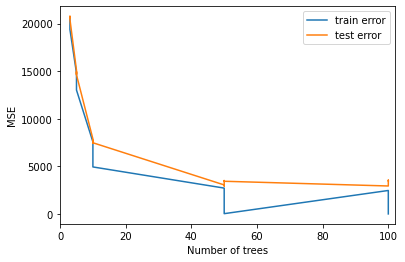

In [80]:
get_error_plot(trees_to_plot, train_error_to_plot, test_error_to_plot)

In [85]:
# Число деревьев в ансамбле
n_trees_list = [3, 5, 10, 50, 100]

# Максимальная глубина деревьев
max_depth_list = [1, 3, 5, 6, 7]

# Шаг
eta = 0.1

results = []

for j in max_depth_list:
    for i in n_trees_list:
        trees, train_errors, test_errors = gb_fit(i, j, X_train, X_test, y_train, y_test, eta)
        results.append([i, j, trees, train_errors, test_errors])

In [86]:
trees_to_plot = []
depth_to_plot = []
train_error_to_plot = []
test_error_to_plot = []

for i in results:
    tree_n = i[0]
    trees_to_plot.append(tree_n)
    depth_to_plot.append(i[1])
    train_error_to_plot.append(i[3][tree_n - 1])
    test_error_to_plot.append(i[4][tree_n - 1])

In [87]:
def get_error_plot(x_axis, train_err, test_err):
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.xlim(0, max(x_axis) + 2)
    plt.plot(x_axis, train_err, label='train error')
    plt.plot(x_axis,test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

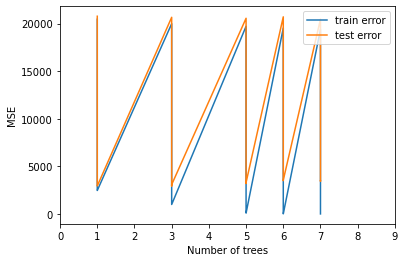

In [88]:
get_error_plot(depth_to_plot, train_error_to_plot, test_error_to_plot)